# 1.서울시 구별 CCTV 현황 분석

    -http://opengov.seoul.go.kr
    -http://data.seoul.go.kr/

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus'] = False
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc('font',family = font_name)

# 1) 데이터 수집


In [4]:
# CCTV 자료 불러오기

cctv_seoul = pd.read_csv("data/seoul/cctv.csv")
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [5]:
# 인구수 자료 불러오기
pop_seoul = pd.read_excel("data/seoul/Report.xls")
pop_seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2018.1/4,합계,4237610,10112070,4948481,5163589,9838892,4817507,5021385,273178,130974,142204,2.32,1382420
3,2018.1/4,종로구,73879,164348,79962,84386,154549,75749,78800,9799,4213,5586,2.09,26429
4,2018.1/4,중구,60903,135139,66582,68557,126082,62376,63706,9057,4206,4851,2.07,21655


# 엑셀에서 B,D,G등 원하는 엑셀의 열을보고 
# usecols="열1,열2,열3" 인수로 넣는다 

## 3번째 줄부터 제목으로 하고싶은경우
    - header = 2

In [7]:

pop_seoul = pd.read_excel("data/seoul/Report.xls",usecols = "B,D,G,J,N",
                         header=2)
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


# 2)전처리
- inplace= True 원본데이터 바꾸는것


In [34]:
## 컬럼 이름 변경
# CCTV자료에서 기관명이라는 컬럼명을 "구별"로 변경
pop_seoul.rename(columns = {pop_seoul.columns[0]:'구별',
                           pop_seoul.columns[1]:'인구수',
                           pop_seoul.columns[2]:'한국인',
                           pop_seoul.columns[3]:'외국인',
                           pop_seoul.columns[4]:'고령자'
                           },inplace = True)
pop_seoul.head()



,구별,인구수,한국인,외국인,고령자
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470


# 탐색적 데이터 분석
### 어느 구가 가장 CCTV가 많이 설치 되어 있는가?
(가장 적게 설치된 곳은 어디인가?)

In [20]:
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [21]:
#cctv 데이터에서 소계를 기준으로 정렬(5개 구 확인)
cctv_seoul.sort_values(by='소계').head(5)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,825,238,159,42,386
2,강북구,831,369,120,138,204
5,광진구,878,573,78,53,174
3,강서구,911,388,258,184,81
24,중랑구,916,509,121,177,109


In [24]:
cctv_seoul.sort_values(by='소계',ascending=False).head(5)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [25]:
cctv_seoul['최근증가율']=(cctv_seoul['2016년']+cctv_seoul['2015년']
                    +cctv_seoul['2014년']/cctv_seoul['2013년도 이전']*100)
print(cctv_seoul.sort_values(by='최근증가율',ascending=False).head(5))

,기관명,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,강남구,3238,1292,430,584,932,1549.281734
4,관악구,2109,846,260,390,613,1033.732861
8,노원구,1566,542,57,451,516,977.516605
22,종로구,1619,464,314,211,630,908.672414
10,동대문구,1870,1070,23,198,579,779.149533


In [27]:
cctv_seoul['최근 증가율'] = cctv_seoul[['2014년','2015년','2016년']].sum(axis=1)/cctv_seoul['2013년도 이전']
cctv_seoul.sort_values(by='최근 증가율', ascending=False).head(5)

,기관명,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,최근 증가율
22,종로구,1619,464,314,211,630,908.672414,2.489224
9,도봉구,825,238,159,42,386,494.806723,2.466387
12,마포구,980,314,118,169,379,585.579618,2.121019
8,노원구,1566,542,57,451,516,977.516605,1.889299
1,강동구,1010,379,99,155,377,558.121372,1.664908


In [29]:
### 인구수 데이터를 분석

# 필요없는 행 삭제 : del, drop 
pop_seoul.drop([0], inplace = True)
pop_seoul.head()

# 구별 데이터의 중복이나 결측치등을 확인

,고령자,인구수,한국인,외국인,65세이상고령자
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470


In [36]:
pop_seoul["구별"].unique()
pop_seoul[pop_seoul["구별"].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,0,0,0,0


In [37]:
pop_seoul.drop([26],inplace = True)

In [43]:
# 어느 구가 인구수가 가장 많은가?

print(pop_seoul.sort_values(by='인구수',ascending=False).head(5))
print("------------------------------")
print(pop_seoul.sort_values(by='외국인',ascending=False).head(5))
print("------------------------------")
print(pop_seoul.sort_values(by='고령자',ascending=False).head(5))
print("------------------------------")
print(pop_seoul.sort_values(by='고령자',ascending=True).head(5))

     구별     인구수     한국인    외국인    고령자
24  송파구  671994  665282   6712  77978
16  강서구  608361  601696   6665  77381
23  강남구  557865  552976   4889  65859
11  노원구  555803  551902   3901  75081
21  관악구  522292  504445  17847  70807
------------------------------
      구별     인구수     한국인    외국인    고령자
19  영등포구  403988  369128  34860  54704
17   구로구  440396  408369  32027  59838
18   금천구  253344  234238  19106  34640
21   관악구  522292  504445  17847  70807
6   동대문구  364962  349308  15654  56284
------------------------------
     구별     인구수     한국인    외국인    고령자
24  송파구  671994  665282   6712  77978
16  강서구  608361  601696   6665  77381
12  은평구  490253  485902   4351  75535
11  노원구  555803  551902   3901  75081
21  관악구  522292  504445  17847  70807
------------------------------
     구별     인구수     한국인    외국인    고령자
2    중구  135139  126082   9057  21655
1   종로구  164348  154549   9799  26429
18  금천구  253344  234238  19106  34640
3   용산구  245411  229909  15502  37238
4   성동구  314551  306532   8

In [47]:
pop_seoul['외국인비율'] = pop_seoul["외국인"]/pop_seoul["인구수"]*100
pop_seoul['고령자비율'] = pop_seoul["고령자"]/pop_seoul["인구수"]*100
print("------------------------------")
print(pop_seoul.sort_values(by='외국인비율',ascending=True).head(5))
print("------------------------------")
print(pop_seoul.sort_values(by='고령자비율',ascending=False).head(5))

------------------------------
     구별     인구수     한국인   외국인    고령자     외국인비율      고령자비율
10  도봉구  345041  342861  2180  54293  0.631809  15.735231
11  노원구  555803  551902  3901  75081  0.701867  13.508563
15  양천구  473087  469221  3866  56070  0.817186  11.851943
23  강남구  557865  552976  4889  65859  0.876377  11.805544
12  은평구  490253  485902  4351  75535  0.887501  15.407351
------------------------------
      구별     인구수     한국인    외국인    고령자     외국인비율      고령자비율
9    강북구  327511  323862   3649  57002  1.114161  17.404606
1    종로구  164348  154549   9799  26429  5.962348  16.081121
2     중구  135139  126082   9057  21655  6.701988  16.024242
10   도봉구  345041  342861   2180  54293  0.631809  15.735231
6   동대문구  364962  349308  15654  56284  4.289214  15.421880


In [49]:
cctv_seoul.rename(columns = {cctv_seoul.columns[0]:'구별',},inplace=True)

In [50]:
# CCTV 데이터와 인구대비 데이터를 합치고 분석하기 
data_result = pd.merge(cctv_seoul, pop_seoul, on= "구별")
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,1549.281734,1.506192,557865,552976,4889,65859,0.876377,11.805544
1,강동구,1010,379,99,155,377,558.121372,1.664908,438225,434027,4198,56983,0.957955,13.003138
2,강북구,831,369,120,138,204,374.520325,1.252033,327511,323862,3649,57002,1.114161,17.404606
3,강서구,911,388,258,184,81,331.494845,1.347938,608361,601696,6665,77381,1.095567,12.719586
4,관악구,2109,846,260,390,613,1033.732861,1.492908,522292,504445,17847,70807,3.417054,13.556976


In [57]:
# 필요없는 칼럼 정리(제거) : 2013년도 이전, 2014,2015,2016년도 제거

# del data_result["2013년도 이전"]
# del data_result["2014년"]
# del data_result["2015년"]
# del data_result["2016년"]

data_result.head()

,구별,소계,최근증가율,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1549.281734,1.506192,557865,552976,4889,65859,0.876377,11.805544
1,강동구,1010,558.121372,1.664908,438225,434027,4198,56983,0.957955,13.003138
2,강북구,831,374.520325,1.252033,327511,323862,3649,57002,1.114161,17.404606
3,강서구,911,331.494845,1.347938,608361,601696,6665,77381,1.095567,12.719586
4,관악구,2109,1033.732861,1.492908,522292,504445,17847,70807,3.417054,13.556976


In [58]:
data_result.set_index("구별",inplace = True) # 구열을 인덱스로 
data_result.head()

,소계,최근증가율,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,,
강남구,3238,1549.281734,1.506192,557865,552976,4889,65859,0.876377,11.805544
강동구,1010,558.121372,1.664908,438225,434027,4198,56983,0.957955,13.003138
강북구,831,374.520325,1.252033,327511,323862,3649,57002,1.114161,17.404606
강서구,911,331.494845,1.347938,608361,601696,6665,77381,1.095567,12.719586
관악구,2109,1033.732861,1.492908,522292,504445,17847,70807,3.417054,13.556976


In [62]:
# CCTV의 개수와 인구 데이터 중 어느 변수와 관계가 있는지를 확인
# 상관계수 -1,~ 1
# 0.3 이하는 약한 상관계수
# 0.4~ 0.7 뚜렷한 상관관계 
np.corrcoef(data_result['고령자비율'],data_result['소계'])
np.corrcoef(data_result['외국인비율'],data_result['소계'])
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.23037183],
       [0.23037183, 1.        ]])

In [63]:
print(data_result.sort_values(by="소계",ascending = False).head())
print("---------------------------")
print(data_result.sort_values(by="인구수",ascending = False).head())
print("---------------------------")
print(data_result.sort_values(by="인구수",ascending = True).head())
print("---------------------------")

       소계        최근증가율    최근 증가율     인구수     한국인    외국인    고령자     외국인비율  \
구별                                                                         
강남구  3238  1549.281734  1.506192  557865  552976   4889  65859  0.876377   
양천구  2482   504.704829  0.346717  473087  469221   3866  56070  0.817186   
서초구  2297   745.166430  0.633713  445164  440954   4210  54055  0.945719   
관악구  2109  1033.732861  1.492908  522292  504445  17847  70807  3.417054   
은평구  2108   765.683656  0.852373  490253  485902   4351  75535  0.887501   

         고령자비율  
구별              
강남구  11.805544  
양천구  11.851943  
서초구  12.142716  
관악구  13.556976  
은평구  15.407351  
---------------------------
       소계        최근증가율    최근 증가율     인구수     한국인    외국인    고령자     외국인비율  \
구별                                                                         
송파구  1081   534.969754  1.043478  671994  665282   6712  77978  0.998818   
강서구   911   331.494845  1.347938  608361  601696   6665  77381  1.095567   
강남구  3238  1549.

In [66]:
# "CCTV비율" 칼럼 추가 : 소계/인구수 *100
data_result['CCTV비율'] = data_result['소계']/data_result['인구수'] *100
data_result.head()
print("--------------------------------")
print(data_result.sort_values(by = "CCTV비율",ascending = False).head())
print("--------------------------------")
print(data_result.sort_values(by = "CCTV비율",ascending = True).head())

--------------------------------
       소계        최근증가율    최근 증가율     인구수     한국인    외국인    고령자     외국인비율  \
구별                                                                         
종로구  1619   908.672414  2.489224  164348  154549   9799  26429  5.962348   
용산구  2096   525.935673  0.532164  245411  229909  15502  37238  6.316750   
중구   1023   466.004843  1.476998  135139  126082   9057  21655  6.701988   
강남구  3238  1549.281734  1.506192  557865  552976   4889  65859  0.876377   
금천구  1348   630.566766  1.000000  253344  234238  19106  34640  7.541525   

         고령자비율    CCTV비율  
구별                        
종로구  16.081121  0.985105  
용산구  15.173729  0.854077  
중구   16.024242  0.756998  
강남구  11.805544  0.580427  
금천구  13.673109  0.532083  
--------------------------------
       소계       최근증가율    최근 증가율     인구수     한국인    외국인    고령자     외국인비율  \
구별                                                                        
강서구   911  331.494845  1.347938  608361  601696   6665  77381 

# 시각화

## CCTV가 많이 설치된 구별로 그래프 그리기

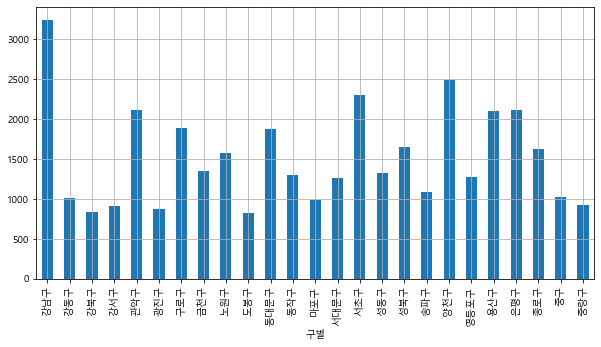

In [68]:
data_result['소계'].plot(kind="bar")
data_result['소계'].plot.bar()
data_result['소계'].plot(kind="bar",figsize=(10,5),grid=True)

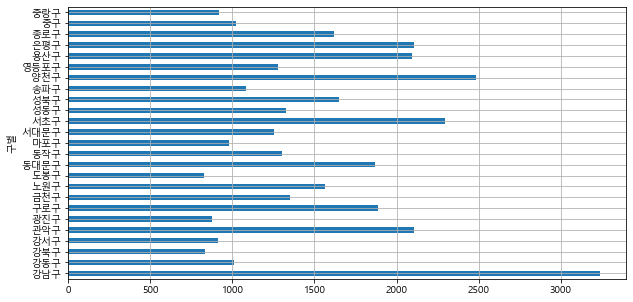

In [69]:
data_result['소계'].plot(kind="barh",figsize=(10,5),grid=True)

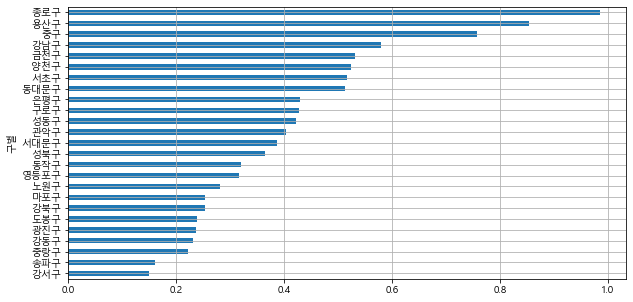

In [71]:
## CCTV 비율로 그래프로 확인
data_result['CCTV비율'].sort_values().plot(kind="barh",figsize=(10,5),grid=True) 

Text(0, 0.5, '소계')

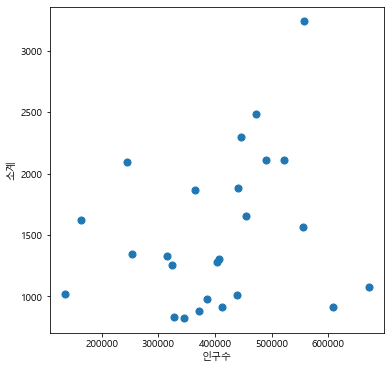

In [73]:
# CCTV 설치 대수와 인구수의 관계를 그래프로 확인
plt.figure(figsize=(6,6))
plt.scatter(data_result["인구수"],data_result["소계"], s=50) #x좌표, y좌표,s 점의크기
plt.xlabel("인구수")
plt.ylabel("소계")

## np.poly1d 방정식
np.poly1d([1,2])


In [74]:
# 최소제곱법
f1 = np.poly1d()

TypeError: __init__() missing 1 required positional argument: 'c_or_r'

In [76]:
print(np.poly1d([1,2]))
print(np.poly1d([1,2,3]))

 
1 x + 2
   2
1 x + 2 x + 3


In [79]:
# 회귀선 직선 : polyfit()
fp1 = np.polyfit(data_result["인구수"],data_result['소계'],1)
print(fp1)

f1 = np.poly1d(fp1)
print(f1)

[1.10432363e-03 1.06864009e+03]
 
0.001104 x + 1069


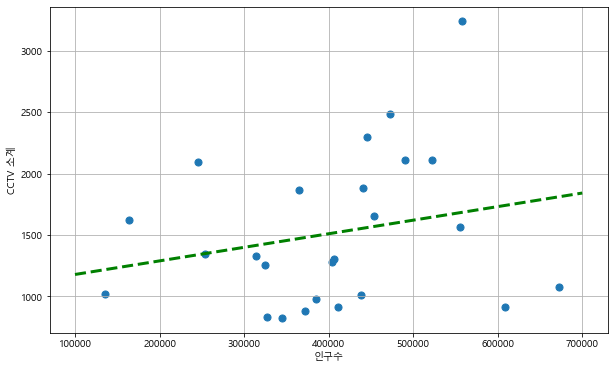

In [85]:
fx = np.linspace(100000,700000,100)
plt.figure(figsize=(10,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
#plt.plot(data_result['인구수'], f1(data_result['인구수']), lw = 3, color = 'g', ls = 'dashed')
plt.plot(fx,f1(fx),lw=3,color="g",ls="dashed")
plt.xlabel('인구수')
plt.ylabel('CCTV 소계')
plt.grid()

In [88]:
# 각 데이터의 오차를 구해서 "오차" 컬럼 추가.
data_result["오차"] = np.abs(data_result["소계"] - f1(data_result["인구수"]))
data_result.head()

,소계,최근증가율,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,,
강남구,3238,1549.281734,1.506192,557865,552976,4889,65859,0.876377,11.805544,0.580427,1553.296412
강동구,1010,558.121372,1.664908,438225,434027,4198,56983,0.957955,13.003138,0.230475,542.582309
강북구,831,374.520325,1.252033,327511,323862,3649,57002,1.114161,17.404606,0.253732,599.318223
강서구,911,331.494845,1.347938,608361,601696,6665,77381,1.095567,12.719586,0.149747,829.467513
관악구,2109,1033.732861,1.492908,522292,504445,17847,70807,3.417054,13.556976,0.403797,463.580517


In [90]:
df_sort = data_result.sort_values(by="오차",ascending=False)
df_sort

,소계,최근증가율,최근 증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,,
강남구,3238,1549.281734,1.506192,557865,552976,4889,65859,0.876377,11.805544,0.580427,1553.296412
양천구,2482,504.704829,0.346717,473087,469221,3866,56070,0.817186,11.851943,0.524639,890.918761
강서구,911,331.494845,1.347938,608361,601696,6665,77381,1.095567,12.719586,0.149747,829.467513
용산구,2096,525.935673,0.532164,245411,229909,15502,37238,6.316750,15.173729,0.854077,756.346747
서초구,2297,745.166430,0.633713,445164,440954,4210,54055,0.945719,12.142716,0.515990,736.754790
송파구,1081,534.969754,1.043478,671994,665282,6712,77978,0.998818,11.603973,0.160865,729.738939
도봉구,825,494.806723,2.466387,345041,342861,2180,54293,0.631809,15.735231,0.239102,624.677016
중랑구,916,309.772102,0.799607,411552,406868,4684,59992,1.138131,14.577016,0.222572,607.126685
광진구,878,240.612565,0.532286,371671,357149,14522,44470,3.907219,11.964883,0.236230,601.085154


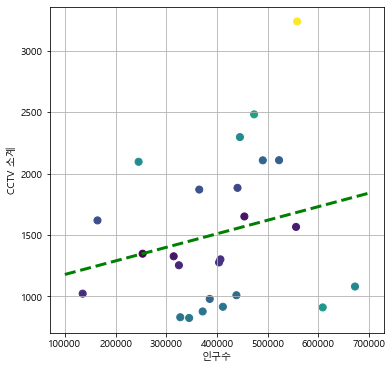

In [91]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50,
           c = data_result["오차"])
#plt.plot(data_result['인구수'], f1(data_result['인구수']), lw = 3, color = 'g', ls = 'dashed')
plt.plot(fx,f1(fx),lw=3,color="g",ls="dashed")
plt.xlabel('인구수')
plt.ylabel('CCTV 소계')
plt.grid()

plt.text(2000000,200000,'text')

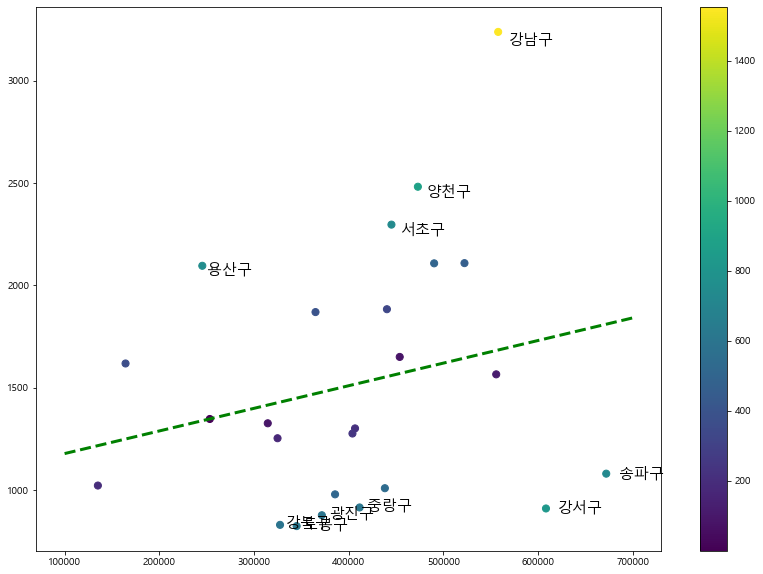

In [96]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'],data_result['소계'],
           c=data_result['오차'],s = 50)
plt.plot(fx,f1(fx),lw=3,color="g",ls="dashed")
#plt.text(3000,4000,"message") 3천,4천 좌표에 메시지를 표기한다.
for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
            df_sort.index[n], fontsize=15)
plt.grid
plt.show
plt.colorbar()

In [97]:
# 최종 결과물 file로 저장
df_sort.to_csv("data/seoul/cctv_result_utf.csv", encoding = "utf-8")
df_sort.to_csv("data/seoul/cctv_result.csv_euc", encoding = "euc-kr")